****<h1 class="custom-h1">💰Global GDP Prediction</h1>

<h2 class="custom-h2">🌍 Introduction</h2>
<div class="custom-note">
Global GDP is a key indicator used to measure the economic strength, growth, and development of countries. It reflects the total value of goods and services produced within a nation and helps compare economic performance across the world.

In this notebook, we explore a Global GDP dataset sourced from reliable organizations such as the World Bank and the United Nations. Our aim is to analyze GDP distribution across countries, identify top economies, observe growth patterns, and highlight key global economic trends through data analysis and visualizations.

This analysis will help us better understand global economic structures and gain insights into how different nations contribute to the world economy.
</div>

<h2 class="custom-h2">Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h3 class="custom-h3">Load The Dataset</h3>

In [2]:
df = pd.read_csv("/kaggle/input/global-gdp-explorer-2024-world-bank-un-data/Global GDP Explorer 2025 (World Bank  UN Data).csv")

<h4 class="custom-h4">Quick Overview Of The Dataset</h4>

In [3]:
df.head()

,Unnamed: 0,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
0,0,United States,"$27,720,700,000,000",27.721 trillion,2.89%,343477335,"$80,706",26.11%
1,1,China,"$17,794,800,000,000",17.795 trillion,5.25%,1422584933,"$12,509",16.76%
2,2,Germany,"$4,525,700,000,000",4.526 trillion,−0.27%,84548231,"$53,528",4.26%
3,3,Japan,"$4,204,490,000,000",4.204 trillion,1.68%,124370947,"$33,806",3.96%
4,4,India,"$3,567,550,000,000",3.568 trillion,8.15%,1438069596,"$2,481",3.36%


<h1 class="custom-h1">📊 Exploratory Data Analysis</h1>

<h5 class="custom-h5">Checking Columns names and their data types using info function</h5>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           181 non-null    int64 
 1   Country              181 non-null    object
 2   GDP (nominal, 2023)  181 non-null    object
 3   GDP (abbrev.)        181 non-null    object
 4   GDP Growth           181 non-null    object
 5   Population 2023      181 non-null    int64 
 6   GDP per capita       181 non-null    object
 7   Share of World GDP   181 non-null    object
dtypes: int64(2), object(6)
memory usage: 11.4+ KB


In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

<h2 class="custom-h2">Checking Missing Data</h2>

In [6]:
df.isnull().sum()

Country                0
GDP (nominal, 2023)    0
GDP (abbrev.)          0
GDP Growth             0
Population 2023        0
GDP per capita         0
Share of World GDP     0
dtype: int64

<h3 class="custom-h3">Checking Duplicates</h3>

In [7]:
df.duplicated().sum()

0

<h4 class="custom-h4">Fixing Numeric Columns</h4>

In [8]:
df.columns

Index(['Country', 'GDP (nominal, 2023)', 'GDP (abbrev.)', 'GDP Growth',
       'Population 2023', 'GDP per capita', 'Share of World GDP'],
      dtype='object')

In [9]:
# Convert 'GDP (abbrev.)' to a more usable format
df['GDP (abbrev.)'] = df['GDP (abbrev.)'].str.lower().str.replace(',', '', regex=False)
# Replace units with numeric multipliers and evaluate
df['GDP'] = (
    df['GDP (abbrev.)']
    .str.replace('trillion', '*1000000000000', regex=False)
    .str.replace('billion', '*1000000000', regex=False)
    .str.replace('million', '*1000000', regex=False)
    .map(pd.eval)  # evaluates strings like '27.7*1000000000000'
)


# Convert 'GDP Growth' to numeric
df['GDP Growth'] = df['GDP Growth'].str.replace('%', '').str.replace('−', '-').astype(float) / 100

# Convert 'GDP per capita' to numeric
df['GDP per capita'] = df['GDP per capita'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert 'Share of World GDP' to numeric
df['Share of World GDP'] = df['Share of World GDP'].str.replace('%', '').astype(float) / 100

In [10]:
df.drop(columns='GDP (abbrev.)', inplace=True)

<h5 class="custom-h5">Overview of cleaned dataset</h5>

In [11]:
# Overview of cleaned dataset
df.head()

,Country,"GDP (nominal, 2023)",GDP Growth,Population 2023,GDP per capita,Share of World GDP,GDP
0,United States,"$27,720,700,000,000",0.0289,343477335,80706.0,0.2611,2.772100e+13
1,China,"$17,794,800,000,000",0.0525,1422584933,12509.0,0.1676,1.779500e+13
2,Germany,"$4,525,700,000,000",-0.0027,84548231,53528.0,0.0426,4.526000e+12
3,Japan,"$4,204,490,000,000",0.0168,124370947,33806.0,0.0396,4.204000e+12
4,India,"$3,567,550,000,000",0.0815,1438069596,2481.0,0.0336,3.568000e+12


In [12]:
df.drop(columns='GDP (nominal, 2023)', inplace=True)

<h5 class="custom-h5">Descriptive Statistics</h5>

In [13]:
df.describe()

,GDP Growth,Population 2023,GDP per capita,Share of World GDP,GDP
count,181.000000,1.810000e+02,181.000000,1.810000e+02,1.810000e+02
mean,0.032770,4.358453e+07,17711.292818,5.440215e-03,5.777528e+11
std,0.068636,1.555468e+08,23301.494510,2.370397e-02,2.516716e+12
min,-0.201100,9.816000e+03,193.000000,5.900000e-07,6.228000e+07
25%,0.011900,2.311472e+06,2478.000000,1.400000e-04,1.464500e+10
50%,0.029400,9.130429e+06,7182.000000,4.600000e-04,4.853000e+10
75%,0.050400,3.363516e+07,22798.000000,3.200000e-03,3.355330e+11
max,0.750600,1.438070e+09,128936.000000,2.611000e-01,2.772100e+13


<h1 class="custom-h1">Data Visualization</h1>

<h2 class="custom-h2">1️⃣ Top 10 Economies by GDP</h2>

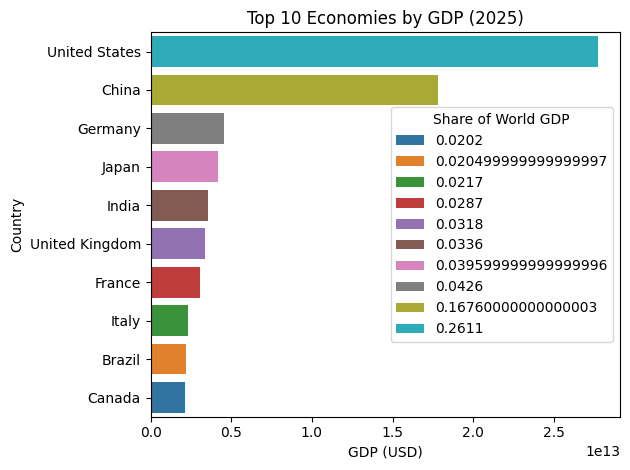

In [14]:
top10 = df.nlargest(10, 'GDP')
plt.figure()
sns.barplot(y='Country', x='GDP', data=top10, hue='Share of World GDP', dodge=False)
plt.title('Top 10 Economies by GDP (2025)')
plt.xlabel('GDP (USD)')
plt.ylabel('Country')
plt.legend(title='Share of World GDP')
plt.tight_layout()
plt.show()

<h3 class="custom-h3">2️⃣ GDP Growth Distribution</h3>

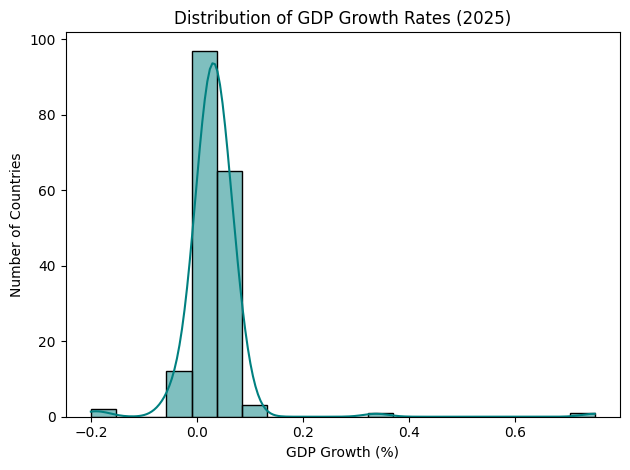

In [15]:
plt.figure()
sns.histplot(df['GDP Growth'], bins=20, kde=True, color='teal')
plt.title('Distribution of GDP Growth Rates (2025)')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

<h4 class="custom-h4">3️⃣ GDP vs Population</h4>

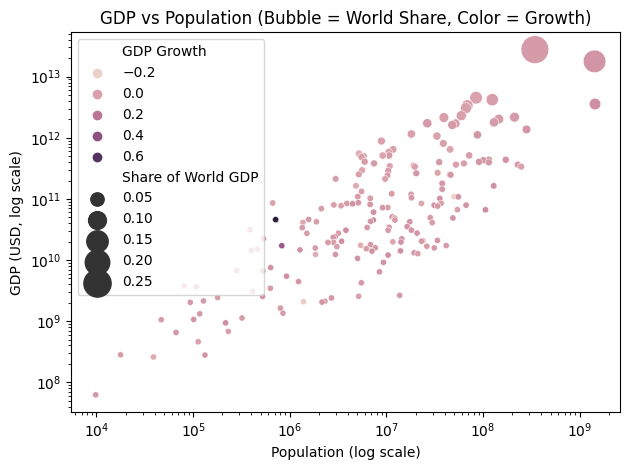

In [16]:
plt.figure()
sns.scatterplot(data=df, x='Population 2023', y='GDP', size='Share of World GDP', hue='GDP Growth', sizes=(20, 400))
plt.title('GDP vs Population (Bubble = World Share, Color = Growth)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Population (log scale)')
plt.ylabel('GDP (USD, log scale)')
plt.legend()
plt.tight_layout()
plt.show()

<h5 class="custom-h5">4️⃣ GDP per Capita vs GDP Growth</h5>

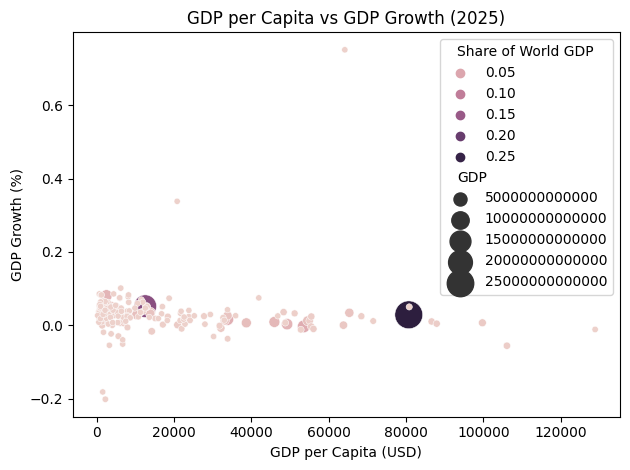

In [17]:
plt.figure()
sns.scatterplot(data=df, x='GDP per capita', y='GDP Growth', hue='Share of World GDP', size='GDP', sizes=(20, 400))
plt.title('GDP per Capita vs GDP Growth (2025)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('GDP Growth (%)')
plt.tight_layout()
plt.show()

<h2 class="custom-h2">5️⃣ Correlation Heatmap</h2>

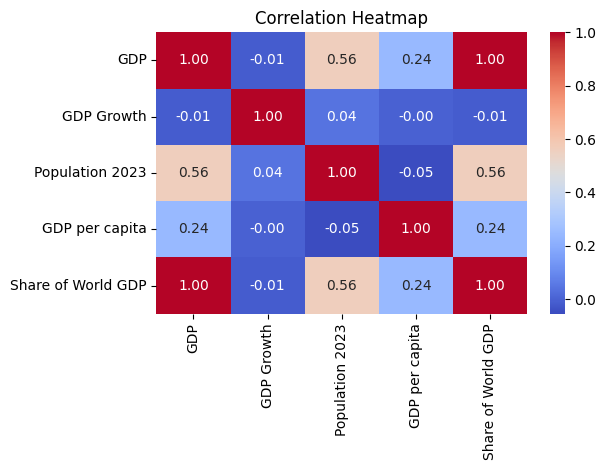

In [18]:
plt.figure()
corr = df[['GDP', 'GDP Growth', 'Population 2023', 'GDP per capita', 'Share of World GDP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

<h1 class="custom-h1">📌KEY INSIGHTS🔎 </h1>
<div class="custom-success">
🌎 United States is the world’s largest economy.<br>
📈 The global median GDP growth rate is 0.03 %.<br>
💰 The highest GDP per capita is in Luxembourg<br>
📊 Correlation shows that population and GDP are strongly positively related.<br>
</div>

In [19]:
final_df = df[['GDP','Population 2023']]

In [20]:
final_df.head()

,GDP,Population 2023
0,2.772100e+13,343477335
1,1.779500e+13,1422584933
2,4.526000e+12,84548231
3,4.204000e+12,124370947
4,3.568000e+12,1438069596


<h2 class="custom-h2">Feature Scaling</h2>

In [21]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Population 2023']
scaler = StandardScaler()
final_df[numeric_cols] = scaler.fit_transform(final_df[numeric_cols])

<h3 class="custom-h3">Splitting Data</h3>

In [22]:
X = final_df.drop('GDP', axis=1)
y = final_df['GDP']

<h4 class="custom-h4">Train The Data</h4>

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1 class="custom-h1">Linear Regression</h1>

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: -0.02
Mean Squared Error: 221857112222209515978752.00


In [27]:
print(X_train.shape, X_test.shape)
print("Train R2:", model.score(X_train, y_train))
print("Test R2:", model.score(X_test, y_test))


(144, 1) (37, 1)
Train R2: 0.3139694929033474
Test R2: -0.017222390081341743


<h1 class="custom-h1">📌 Model Performance Explanation</h1>
<div class="custom-success">
Initially, the model showed an R² score of ~1.0, which seemed perfect. However, this was due to data leakage — one of the features (GDP per capita and Share of World GDP) was mathematically dependent on the target variable GDP.
As soon as those columns were removed, the model produced realistic R² scores.<br>

After removing the leakage columns, the model was trained using only Population as the predictor.
</div>

<h1 class="custom-h1">✅ Why R² Dropped After Removing Features</h1>
<div class="custom-note">
R² dropped because Population alone is not enough to explain GDP.<br>
GDP depends on many economic factors such as:<br>

->Exports & imports<br>
->Industrial output<br>
->Productivity<br>
->Human Development Index (HDI)<br>
->Education & technology levels<br>
->Government policies and stability<br>

Population has some relationship with GDP (larger populations can produce more), but it does not determine GDP by itself. Therefore, the model gives a low (or slightly negative) R² score, indicating weak predictive power with this single feature.
</div>

<h1 class="custom-h1">📊 Conclusion</h1>
<div class="custom-warning">
The drop in R² is expected and correct. It shows the model is now learning realistically rather than relying on mathematical leakage.
</div>

<h2 style="color:darkblue; text-align:center; margin-top:30px;font-size:3.9em;font-weight:bold">💙 Thank You 💙</h2>
<p class="custom-p">
Thank you for taking the time to explore my notebook!<br>
If you found it helpful or inspiring, please consider <b>upvoting</b> ⭐ and <b>leaving feedback</b> 💬.<br>
Your support motivates me to keep improving and sharing more analyses 🙌
</p>